In [1]:
import os
os.chdir("C:/Users/Komal S Boraste/Desktop/LRProject/Vehicle Performance Prediction/Dataset")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
from sklearn.linear_model import LinearRegression

df=pd.read_csv("data.csv")

In [2]:
df

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130,3504,12.0,1970,chevrolet chevelle malibu,7.652587
1,1,8,350.0,165,3693,11.5,1970,buick skylark 320,6.377156
2,1,8,318.0,150,3436,11.0,1970,plymouth satellite,7.652587
3,1,8,304.0,150,3433,12.0,1970,amc rebel sst,6.802299
4,1,8,302.0,140,3449,10.5,1970,ford torino,7.227443
...,...,...,...,...,...,...,...,...,...
393,1,4,140.0,86,2790,15.6,1982,ford mustang gl,11.478880
394,2,4,97.0,52,2130,24.6,1982,vw pickup,18.706323
395,1,4,135.0,84,2295,11.6,1982,dodge rampage,13.604599
396,1,4,120.0,79,2625,18.6,1982,ford ranger,11.904024


In [3]:
df.shape

(398, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               398 non-null    int64  
 1   cylinders            398 non-null    int64  
 2   displacement         398 non-null    float64
 3   horsepower           398 non-null    object 
 4   weight               398 non-null    int64  
 5   acceleration         398 non-null    float64
 6   year                 398 non-null    int64  
 7   name                 398 non-null    object 
 8   Kilometer_per_liter  398 non-null    float64
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [5]:
df.columns[df.isna().any()]

Index([], dtype='object')

In [6]:
df.describe()

,origin,cylinders,displacement,weight,acceleration,year,Kilometer_per_liter
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,1.572864,5.454774,193.425879,2970.424623,15.568090,1976.010050,9.997073
std,0.802055,1.701004,104.269838,846.841774,2.757689,3.697627,3.322917
min,1.000000,3.000000,68.000000,1613.000000,8.000000,1970.000000,3.826293
25%,1.000000,4.000000,104.250000,2223.750000,13.825000,1973.000000,7.440015
50%,1.000000,4.000000,148.500000,2803.500000,15.500000,1976.000000,9.778305
75%,2.000000,8.000000,262.000000,3608.000000,17.175000,1979.000000,12.329168
max,3.000000,8.000000,455.000000,5140.000000,24.800000,1982.000000,19.811697


In [7]:
df.replace('?',np.nan,inplace=True)

In [8]:
avg=df['horsepower'].astype('float').mean(axis=0)
avg

104.46938775510205

In [9]:
df['horsepower'].replace(np.nan,avg,inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               398 non-null    int64  
 1   cylinders            398 non-null    int64  
 2   displacement         398 non-null    float64
 3   horsepower           398 non-null    object 
 4   weight               398 non-null    int64  
 5   acceleration         398 non-null    float64
 6   year                 398 non-null    int64  
 7   name                 398 non-null    object 
 8   Kilometer_per_liter  398 non-null    float64
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [11]:
df.horsepower=df.horsepower.astype('float')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               398 non-null    int64  
 1   cylinders            398 non-null    int64  
 2   displacement         398 non-null    float64
 3   horsepower           398 non-null    float64
 4   weight               398 non-null    int64  
 5   acceleration         398 non-null    float64
 6   year                 398 non-null    int64  
 7   name                 398 non-null    object 
 8   Kilometer_per_liter  398 non-null    float64
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [13]:
df.describe()

,origin,cylinders,displacement,horsepower,weight,acceleration,year,Kilometer_per_liter
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,1.572864,5.454774,193.425879,104.469388,2970.424623,15.568090,1976.010050,9.997073
std,0.802055,1.701004,104.269838,38.199187,846.841774,2.757689,3.697627,3.322917
min,1.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,1970.000000,3.826293
25%,1.000000,4.000000,104.250000,76.000000,2223.750000,13.825000,1973.000000,7.440015
50%,1.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,1976.000000,9.778305
75%,2.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,1979.000000,12.329168
max,3.000000,8.000000,455.000000,230.000000,5140.000000,24.800000,1982.000000,19.811697


## Analysis on target variable

C:\Users\Komal S Boraste\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


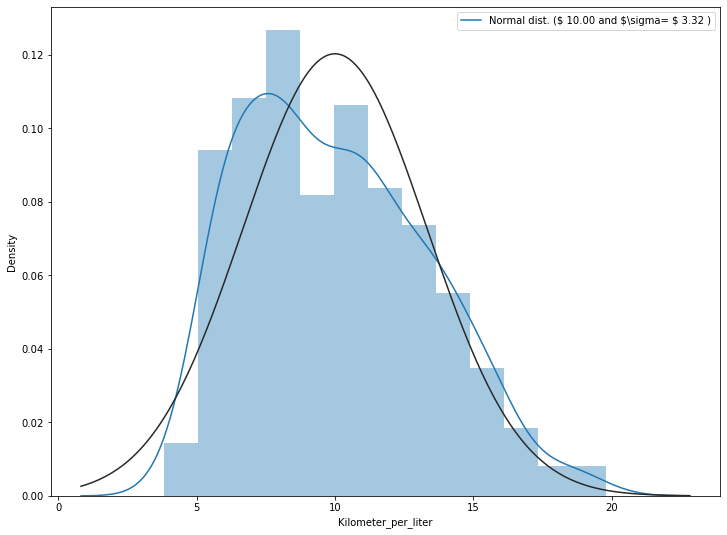

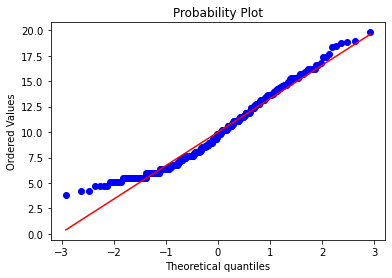

In [14]:
plt.subplots(figsize=(12,9))
sns.distplot(df['Kilometer_per_liter'],fit=stats.norm)
#get the fitted parameter used by the function
(mu,sigma)=stats.norm.fit(df['Kilometer_per_liter'])
#plot with the distribution
plt.legend(['Normal dist. ($ {:.2f} and $\sigma= $ {:.2f} )'.format(mu,sigma)],loc='best')
#probability plot
fig=plt.figure()
stats.probplot(df['Kilometer_per_liter'],plot=plt)
plt.show()

#### Use of log function is most common way to make a more normal distribution. We will do that in the following section. 

C:\Users\Komal S Boraste\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


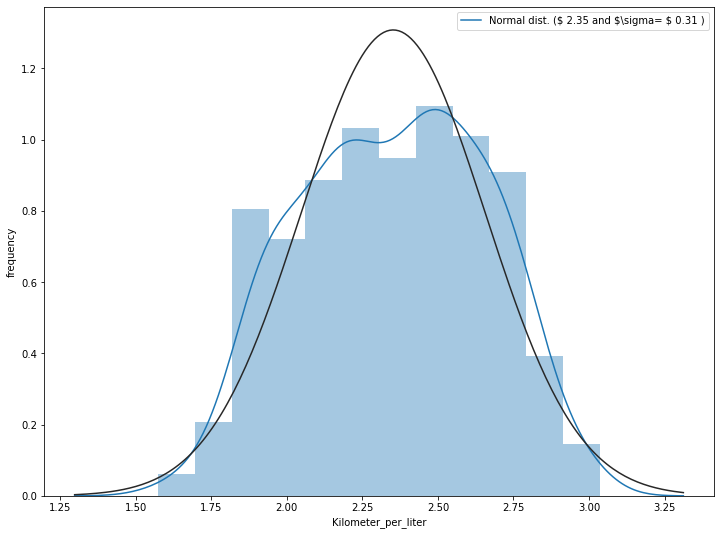

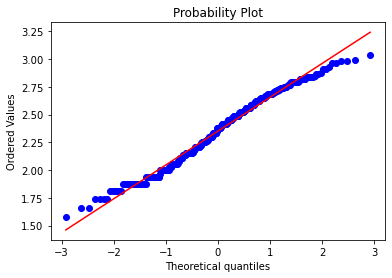

In [15]:
#we use log which is a part of numpy library
df['Kilometer_per_liter']=np.log1p(df['Kilometer_per_liter'])
#check again for normal distribution
plt.subplots(figsize=(12,9))
sns.distplot(df['Kilometer_per_liter'], fit=stats.norm)
#get the fitted parameters used by the function
(mu,sigma)=stats.norm.fit(df['Kilometer_per_liter'])
#plot with the distribution
plt.legend(['Normal dist. ($ {:.2f} and $\sigma= $ {:.2f} )'.format(mu,sigma)],loc='best')
plt.ylabel('frequency')
#probability plot
fig=plt.figure()
stats.probplot(df['Kilometer_per_liter'],plot=plt)
plt.show()

In [16]:
#Correlation of target variable with other independent variables.
print('Find the most important features relative to the target')
corr=df.corr()
corr.sort_values(['Kilometer_per_liter'],ascending=False,inplace=True)
corr.Kilometer_per_liter

Find the most important features relative to the target


Kilometer_per_liter    1.000000
year                   0.577211
origin                 0.560084
acceleration           0.443890
horsepower            -0.820539
cylinders             -0.822682
displacement          -0.850550
weight                -0.872846
Name: Kilometer_per_liter, dtype: float64

<AxesSubplot:>

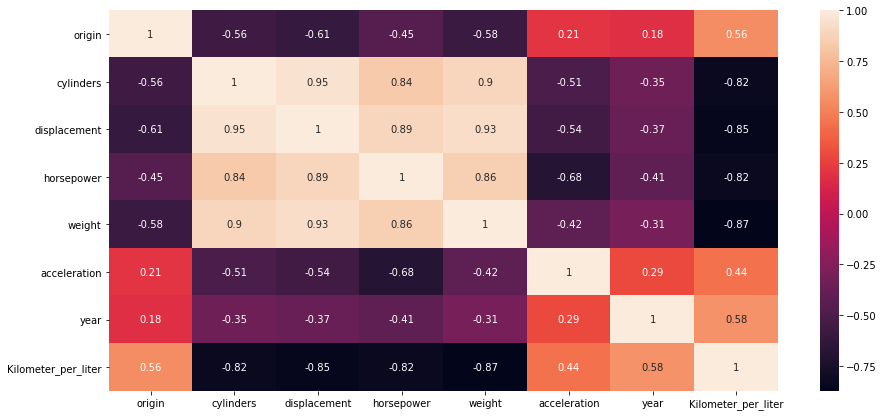

In [17]:
corr1=df.corr()
plt.subplots(figsize=(15,7))
sns.heatmap(corr1,annot=True)

C:\Users\Komal S Boraste\anaconda3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


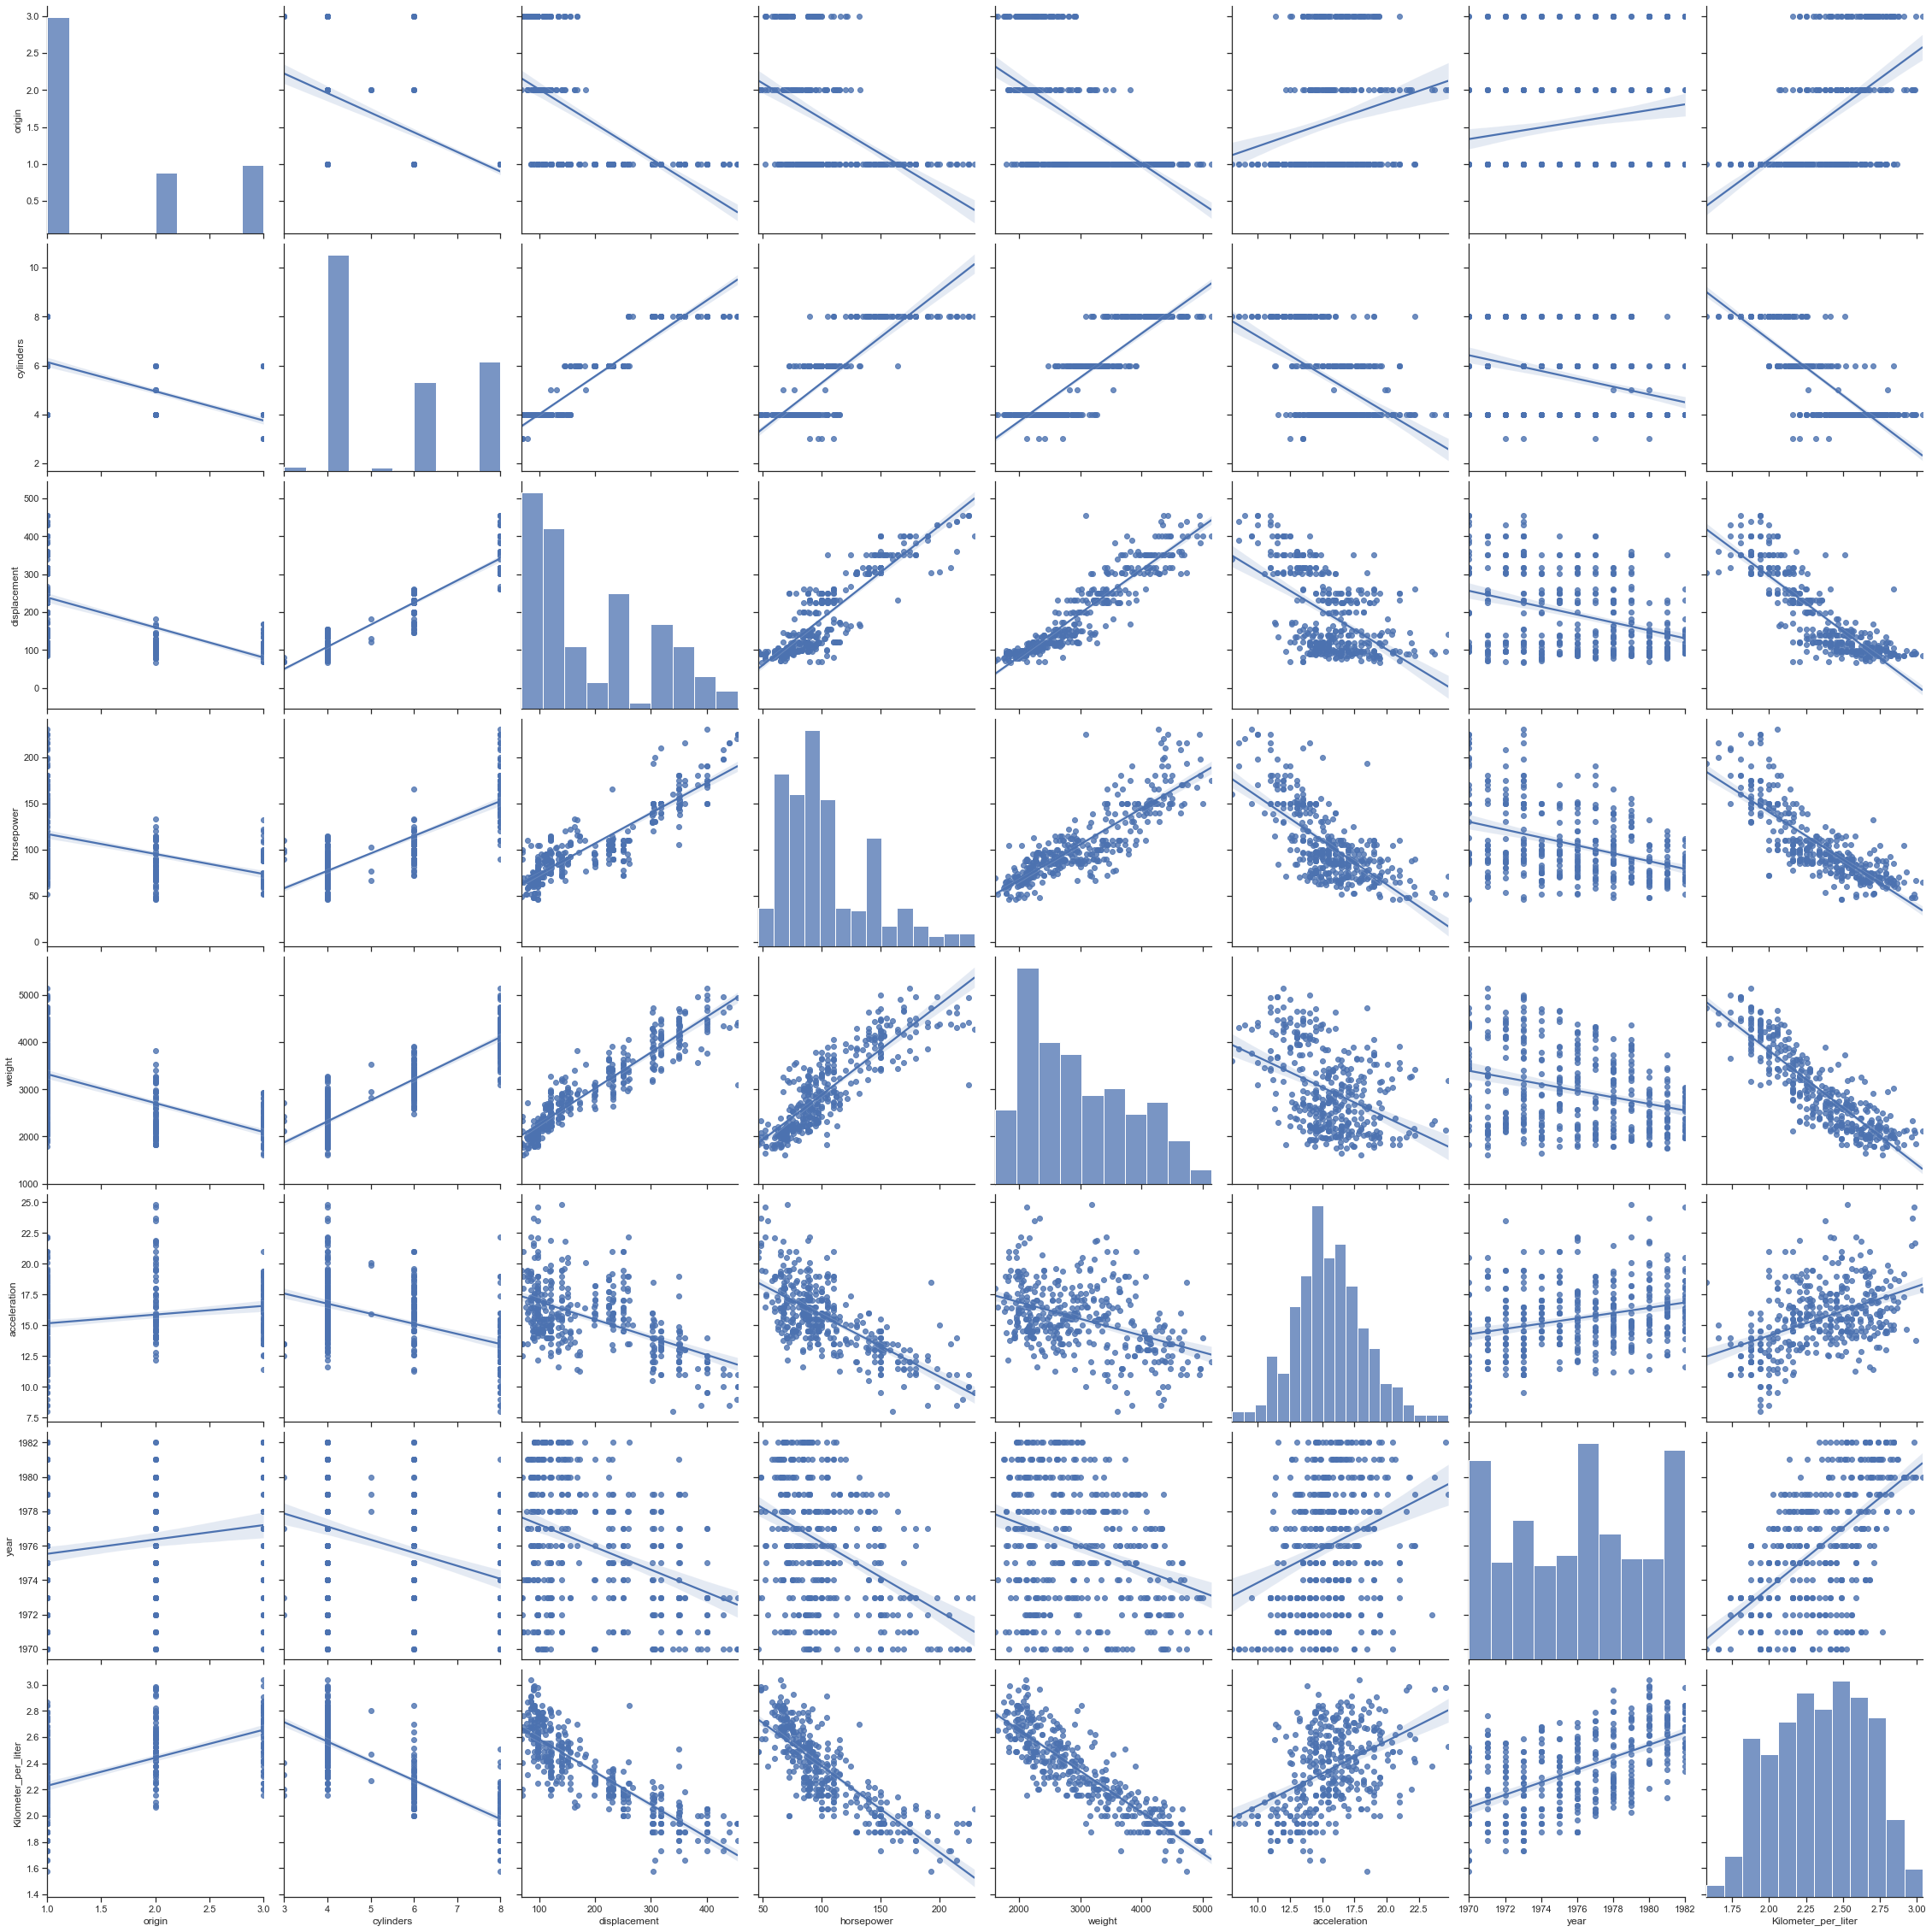

In [18]:
#Pair plot
sns.set(style='ticks')
sns.pairplot(df,size=4,kind='reg')

In [19]:
#Converting categorical variable into numeric using LabelEncoder.
df_cat=df.select_dtypes(include='object').columns

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
#Label encoding categorical variables
for c in df_cat:
    lbl=LabelEncoder()
    lbl.fit(list(df[c].values))
    df[c]=lbl.transform(list(df[c].values))

In [22]:
df[c].dtype

dtype('int64')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               398 non-null    int64  
 1   cylinders            398 non-null    int64  
 2   displacement         398 non-null    float64
 3   horsepower           398 non-null    float64
 4   weight               398 non-null    int64  
 5   acceleration         398 non-null    float64
 6   year                 398 non-null    int64  
 7   name                 398 non-null    int64  
 8   Kilometer_per_liter  398 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.1 KB


## Linear Regression with all variables

In [24]:
#Linear Regression with all variables.
lm=LinearRegression()

In [25]:
y=df['Kilometer_per_liter']

In [26]:
x=df.drop(['Kilometer_per_liter'],axis=1)

In [27]:
x.columns

Index(['origin', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'name'],
      dtype='object')

In [28]:
df['name'].dtype

dtype('int64')

In [29]:
lm.fit(x,y)

LinearRegression()

In [30]:
print("Intercept for the multiple Linear regression is:",lm.intercept_)
print("Coef for multiple linear regression is:",lm.coef_)

Intercept for the multiple Linear regression is: -50.4931657862959
Coef for multiple linear regression is: [ 0.03397937 -0.02221105  0.00056908 -0.00102206 -0.00024228  0.00022425
  0.02712988  0.00011156]


In [31]:
yhat=lm.predict(x)

In [32]:
from sklearn.metrics import mean_squared_error,r2_score
from math import sqrt
mse=mean_squared_error(y,yhat)
r_squared=r2_score(y,yhat)
rmse=sqrt(mse)

In [33]:
print("Mean_squared_error:",mse)
print("Root_mean_squared_error:",rmse)
print("r_square_value:",r_squared)

Mean_squared_error: 0.011477552357723415
Root_mean_squared_error: 0.10713333915137442
r_square_value: 0.876723133369915


In [34]:
#Take the values as X and Y
X=x.values
y=y.values

## Standard Scaling

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
scale=StandardScaler()

In [37]:
x_sc=scale.fit_transform(X)

In [38]:
lm_sc=lm.fit(x_sc,y)

In [39]:
yhat_sc=lm.predict(x_sc)

In [40]:
mse=mean_squared_error(y,yhat_sc)
r_squared=r2_score(y,yhat_sc)
rmse=sqrt(mse)

In [41]:
print("Mean_squared_error:",mse)
print("Root_mean_squared_error:",rmse)
print("r_square_value:",r_squared)

Mean_squared_error: 0.011477552357723448
Root_mean_squared_error: 0.10713333915137457
r_square_value: 0.8767231333699147


## Linear Regression with Train-Test Split

In [42]:
#split data into train and test format
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=7)

In [43]:
model=LinearRegression()

In [44]:
model.fit(X_train,y_train)

LinearRegression()

In [45]:
#prediction for a train data
pred=model.predict(X_train)

In [46]:
#Score/Accuracy
print('Accuracy',model.score(X_train,y_train)*100)

Accuracy 88.99060231054483


In [47]:
mse=mean_squared_error(y_train,pred)
r_squared=r2_score(y_train,pred)
rmse=sqrt(mse)

In [48]:
print("Mean_squared_error:",mse)
print("Root_mean_squared_error:",rmse)
print("r_square_value:",r_squared)

Mean_squared_error: 0.010722085785615593
Root_mean_squared_error: 0.10354750497049937
r_square_value: 0.8899060231054483


In [49]:
#Prediction for test data.
pred_t=model.predict(X_test)

In [50]:
#Score/Accuracy
print('Accuracy',model.score(X_test,y_test)*100)

Accuracy 80.27439456694647


In [51]:
mse=mean_squared_error(y_test,pred_t)
r_squared=r2_score(y_test,pred_t)
rmse=sqrt(mse)

In [52]:
print("Mean_squared_error:",mse)
print("Root_mean_squared_error:",rmse)
print("r_square_value:",r_squared)

Mean_squared_error: 0.014906773179221178
Root_mean_squared_error: 0.1220932970282201
r_square_value: 0.8027439456694647


C:\Users\Komal S Boraste\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Komal S Boraste\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


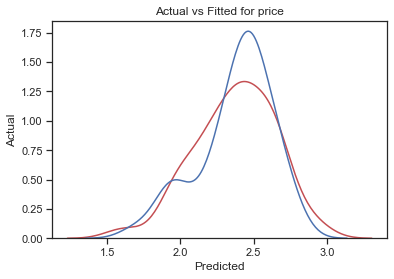

In [53]:
#Distribution plot of actual and predicted values
ax1=sns.distplot(y_test,hist=False,color='r',label='Actual values')
sns.distplot(pred_t,hist=False,color='b',label='Predicted values',ax=ax1)
plt.title('Actual vs Fitted for price')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Polynomial Regression

In [54]:
from sklearn.preprocessing import PolynomialFeatures

In [55]:
#Raise degree of independent var
pr=PolynomialFeatures(degree=2)

In [56]:
X_train_pr=pr.fit_transform(X_train)
X_test_pr=pr.fit_transform(X_test)

In [57]:
model_pr=model.fit(X_train_pr,y_train)

In [58]:
model_pre=model.predict(X_test_pr)

In [59]:
model_pre[0:5]

array([2.58295434, 2.55124573, 2.76070595, 2.56720873, 2.82343463])

In [60]:
y_test[0:5]

array([2.48937469, 2.33729194, 2.75699824, 2.62135232, 2.61515116])

In [61]:
mse=mean_squared_error(y_test,model_pre)
r_squared=r2_score(y_test,model_pre)
rmse=sqrt(mse)

In [62]:
print("Mean_squared_error:",mse)
print("Root_mean_squared_error:",rmse)
print("r_square_value:",r_squared)

Mean_squared_error: 0.036652073384101334
Root_mean_squared_error: 0.19144731229270714
r_square_value: 0.514996083199356


C:\Users\Komal S Boraste\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Komal S Boraste\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


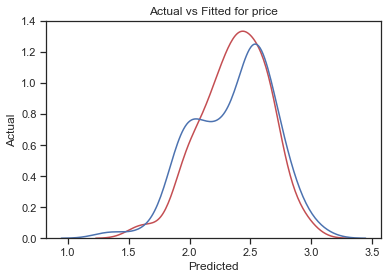

In [63]:
#Distribution plot of actual and predicted values
ax1=sns.distplot(y_test,hist=False,color='r',label='Actual values')
sns.distplot(model_pre,hist=False,color='b',label='Predicted values',ax=ax1)
plt.title('Actual vs Fitted for price')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Cross validation on Linear Regression 

In [64]:
model.fit(X_train,y_train)

LinearRegression()

In [65]:
model.score(X_test,y_test)

0.8027439456694647

In [66]:
model.score(X_train,y_train)

0.8899060231054483

In [67]:
from sklearn.model_selection import cross_val_score

In [68]:
Rcross=cross_val_score(model,X_train,y_train,cv=4)

In [69]:
Rcross

array([0.88255407, 0.89784933, 0.86090471, 0.89979232])

## Ridge Regression

In [70]:
from sklearn.linear_model import Ridge

In [71]:
RidgeModel=Ridge(alpha=0.1)

In [72]:
RidgeModel.fit(X_train,y_train)

Ridge(alpha=0.1)

In [73]:
yhat_Ridge=RidgeModel.predict(X_test)

In [74]:
print('Predicted',yhat_Ridge[0:4])

Predicted [2.50445398 2.52498073 2.68439501 2.44668166]


In [75]:
print('Test set values',y_test[0:4])

Test set values [2.48937469 2.33729194 2.75699824 2.62135232]


In [76]:
#R score for test split
Rcross1=cross_val_score(RidgeModel,X_test,y_test,cv=4)

In [77]:
Rcross1

array([0.74714993, 0.81295565, 0.63676673, 0.7580223 ])

C:\Users\Komal S Boraste\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Komal S Boraste\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


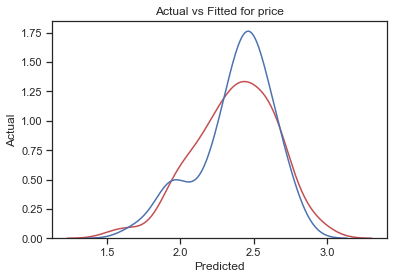

In [78]:
#Distribution plot of actual and predicted values
ax1=sns.distplot(y_test,hist=False,color='r',label='Actual values')
sns.distplot(yhat_Ridge,hist=False,color='b',label='Predicted values',ax=ax1)
plt.title('Actual vs Fitted for price')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [79]:
# R score for train split
Rcross2=cross_val_score(RidgeModel,X_train,y_train,cv=4)

In [80]:
Rcross2

array([0.88258077, 0.89784014, 0.86090179, 0.89979439])

## Grid Search for Hyperparameter Tuning

In [81]:
from sklearn.model_selection import GridSearchCV

In [82]:
parameters1=[{'alpha':[0.001,0.1,1,10,100,1000,10000,100000]}]

In [83]:
RR=Ridge()

In [84]:
RR

Ridge()

In [85]:
Grid1=GridSearchCV(RR,parameters1,cv=4)

In [86]:
Grid1.fit(X_test,y_test)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000,
                                    100000]}])

In [87]:
BestRR=Grid1.best_estimator_

In [88]:
BestRR

Ridge(alpha=100)

In [89]:
BestRR.score(X_test,y_test)

0.8248213555007844

In [90]:
# R score for test split
Rcross3=cross_val_score(Grid1,X_test,y_test,cv=4)

In [91]:
Rcross3

array([0.77406772, 0.80940288, 0.62809375, 0.78984513])